In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1798,2020-09-29,United Kingdom,439582.0,439013.0,42046.0,42001.0,569.0,45.0
1799,2020-09-29,Germany,286658.0,287421.0,9469.0,9471.0,-763.0,-2.0
1800,2020-09-29,Iran,449641.0,449960.0,25800.0,25779.0,-319.0,21.0
1801,2020-09-29,Turkey,315651.0,315845.0,8055.0,8062.0,-194.0,-7.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  11375.084303937881
RMSE =  40956.16888405093


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  321.10593455352193
RMSE =  808.5522253100286


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  83545.40588235293
RMSE =  129534.35725249749
-- World performances for deaths --
MAE =  1927.6176470588234
RMSE =  2346.6593639870775


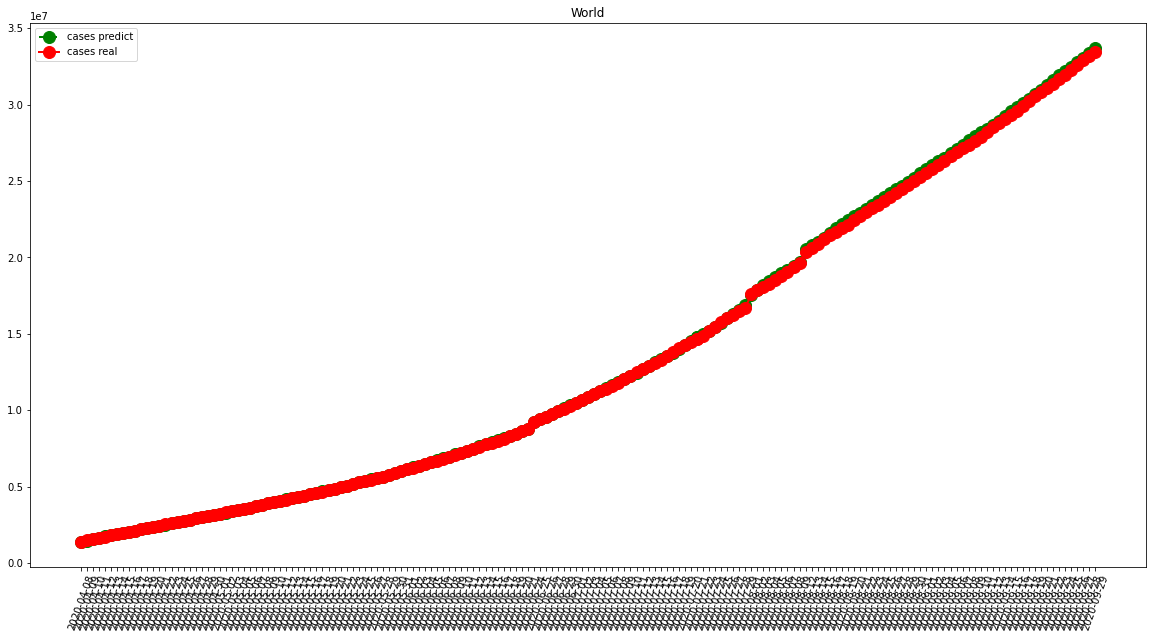

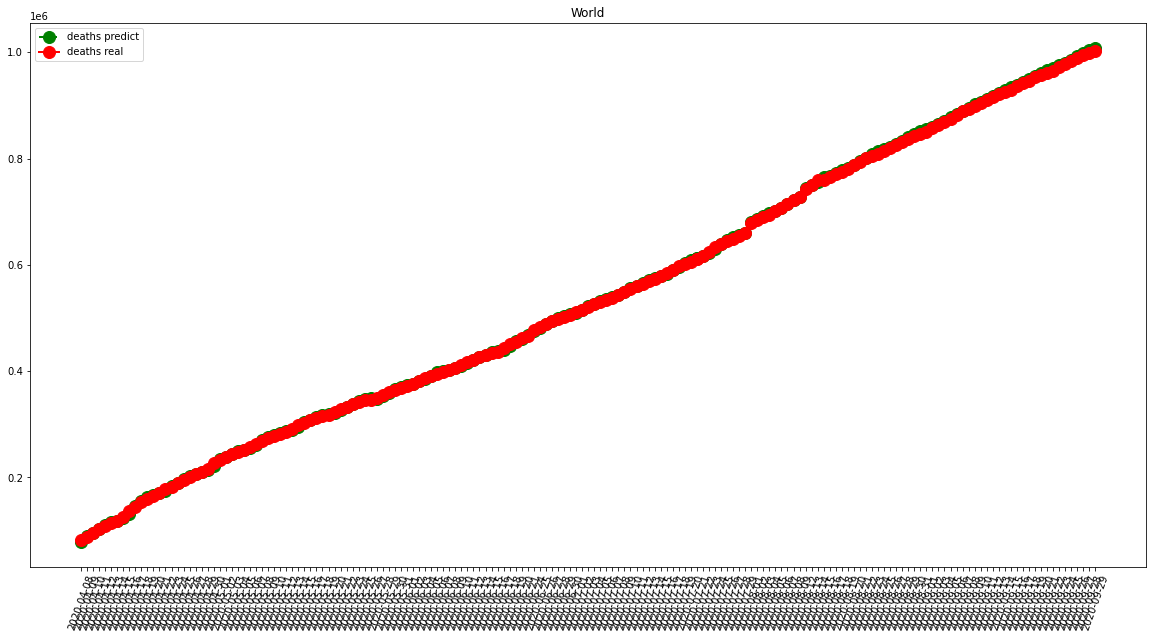

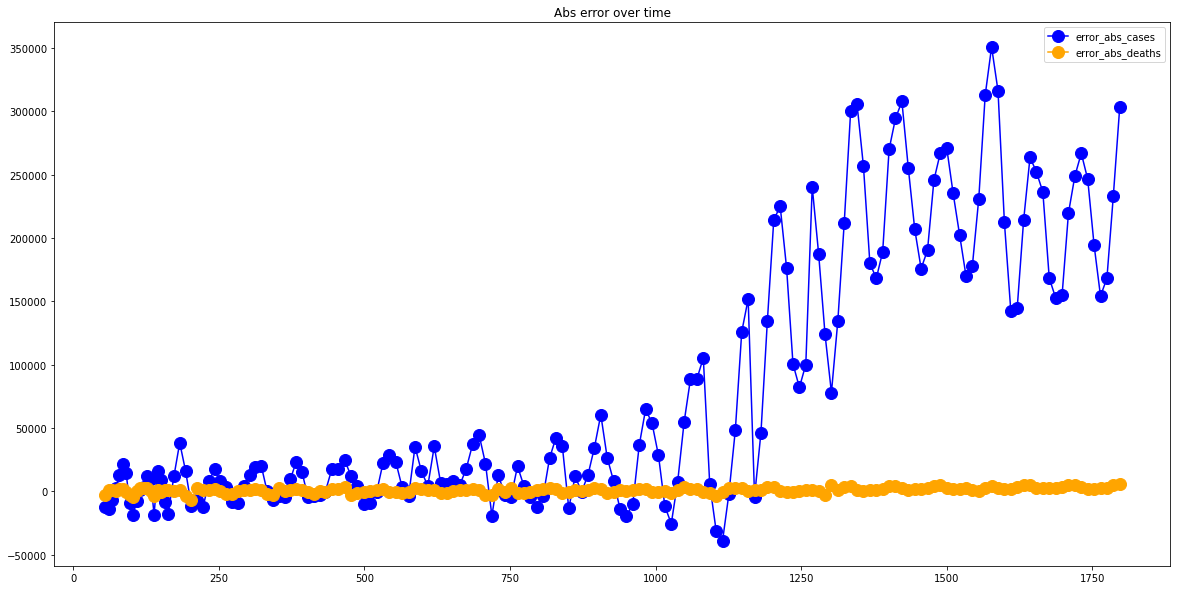

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1327.55
RMSE =  2085.647737115099
-- France performances for deaths --
MAE =  109.0
RMSE =  250.7352964560213


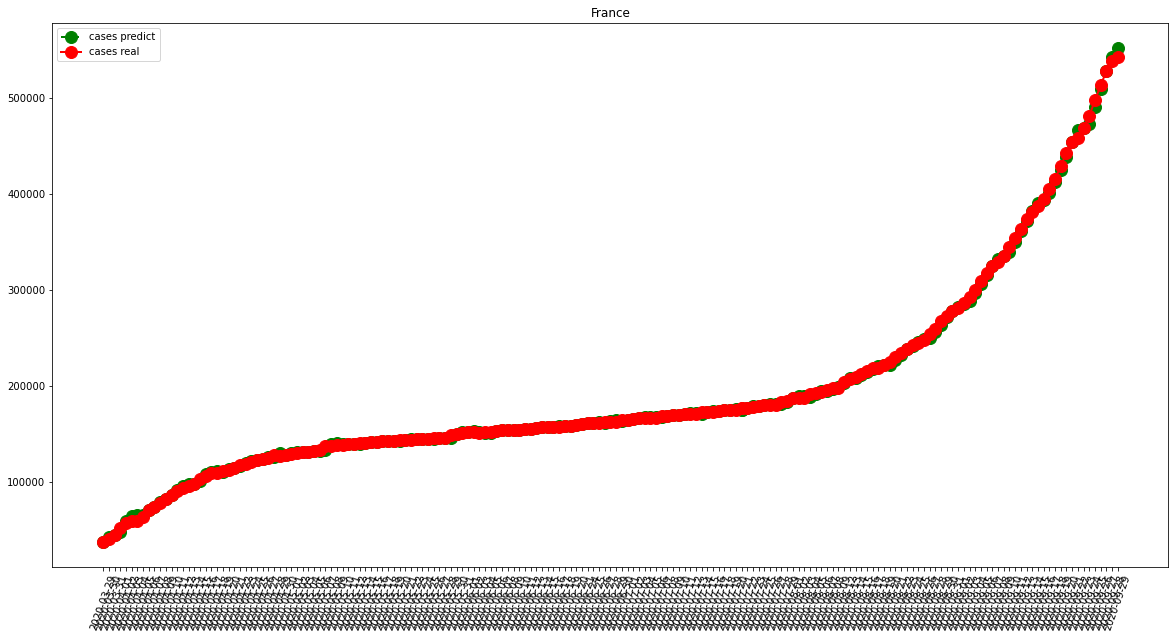

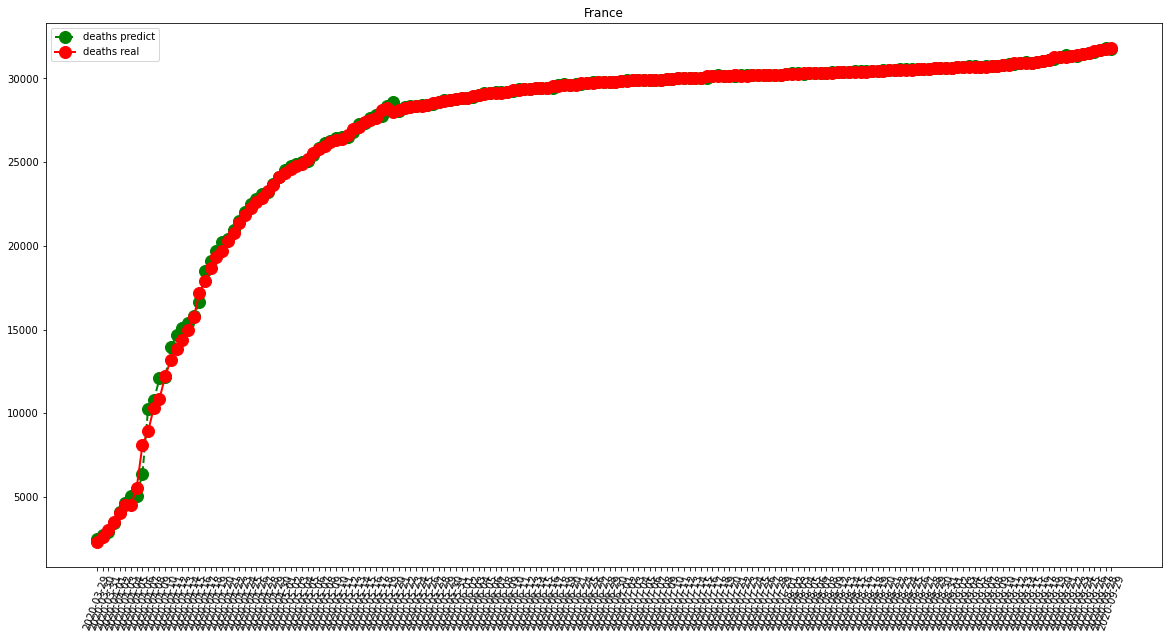

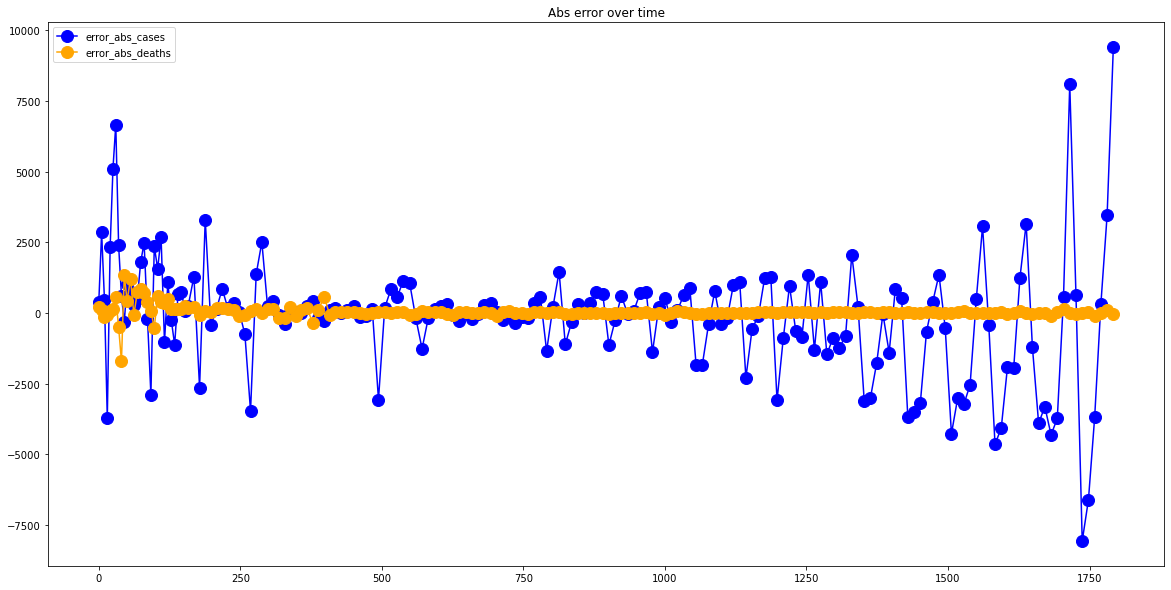

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  303.44444444444446
RMSE =  442.5969197061061
-- Italy performances for deaths --
MAE =  64.42222222222222
RMSE =  221.35818133614228


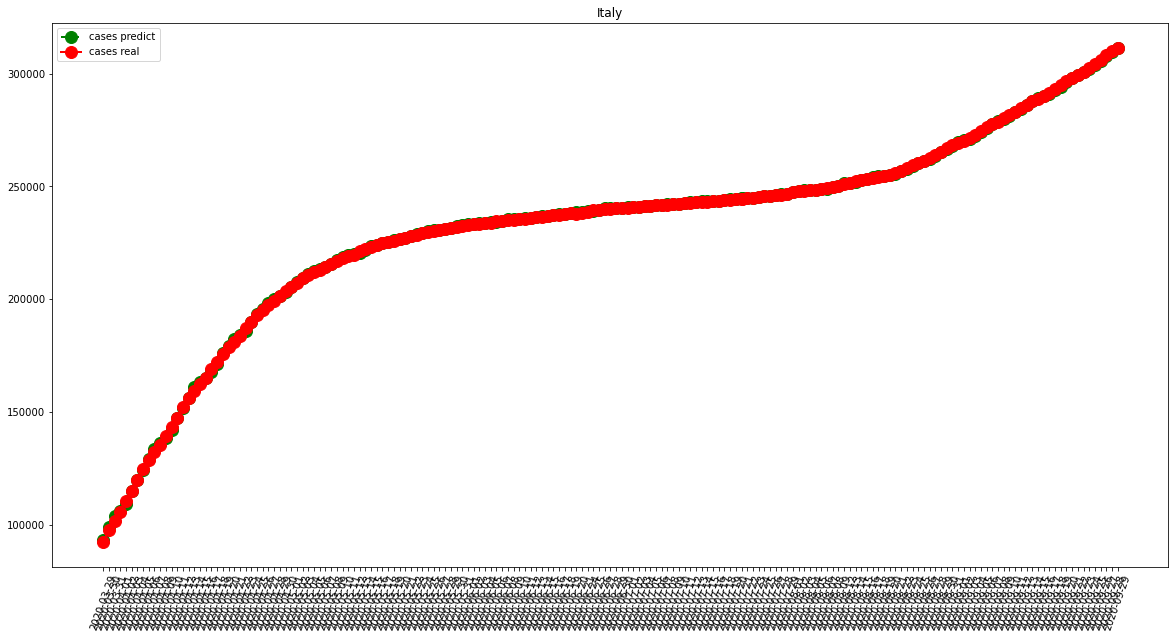

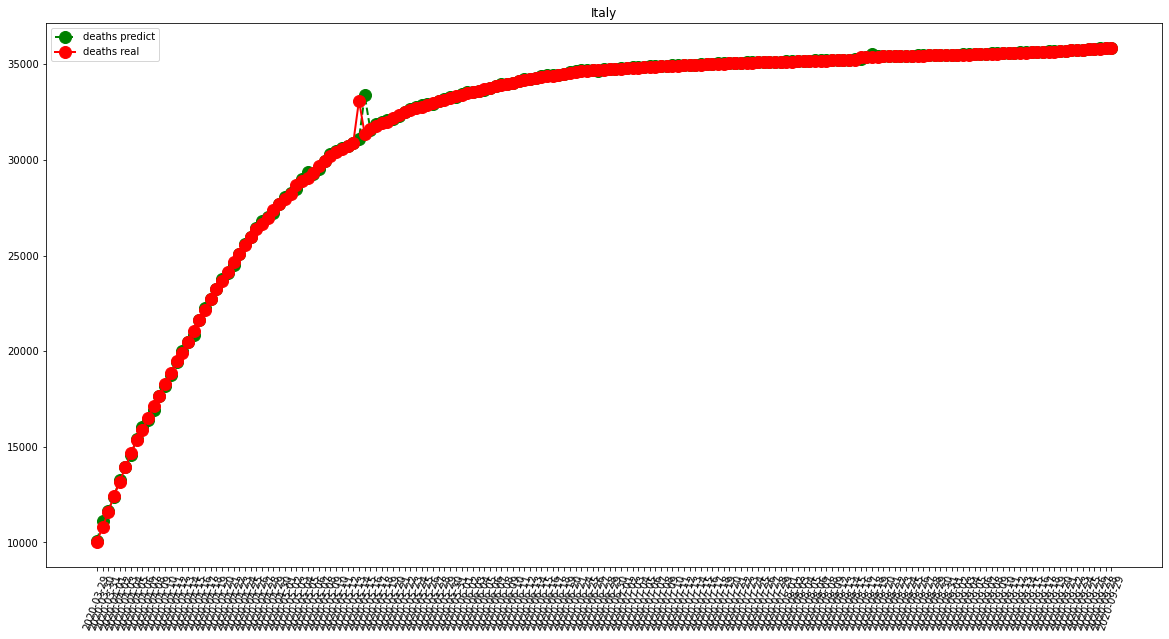

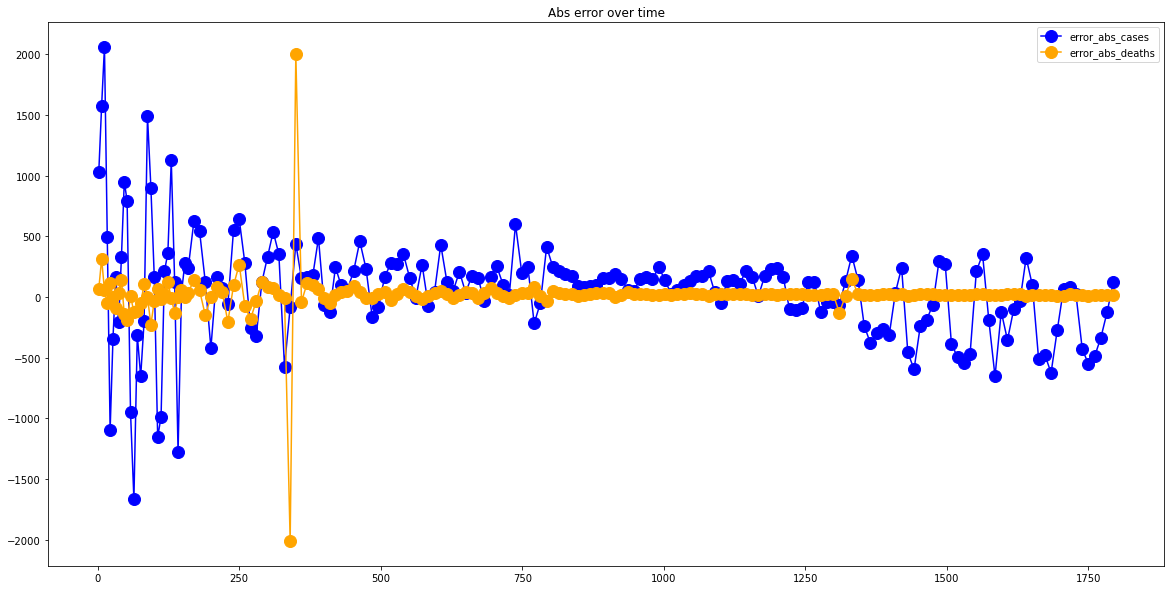

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2899.6277777777777
RMSE =  5672.73812731657
-- Spain performances for deaths --
MAE =  119.59444444444445
RMSE =  305.46490069328024


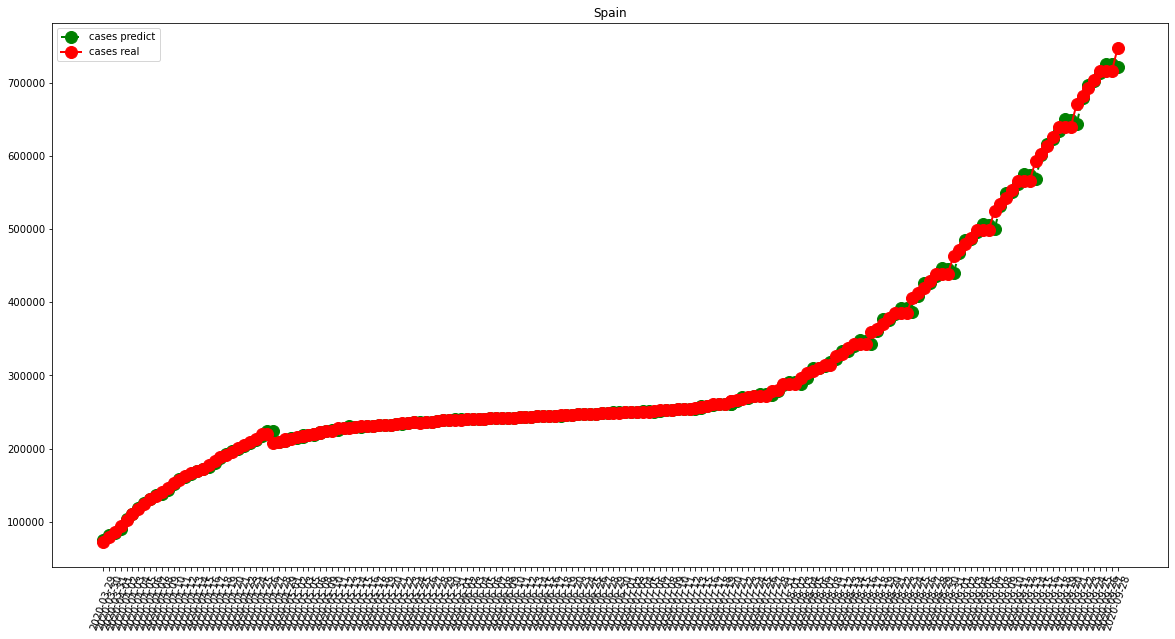

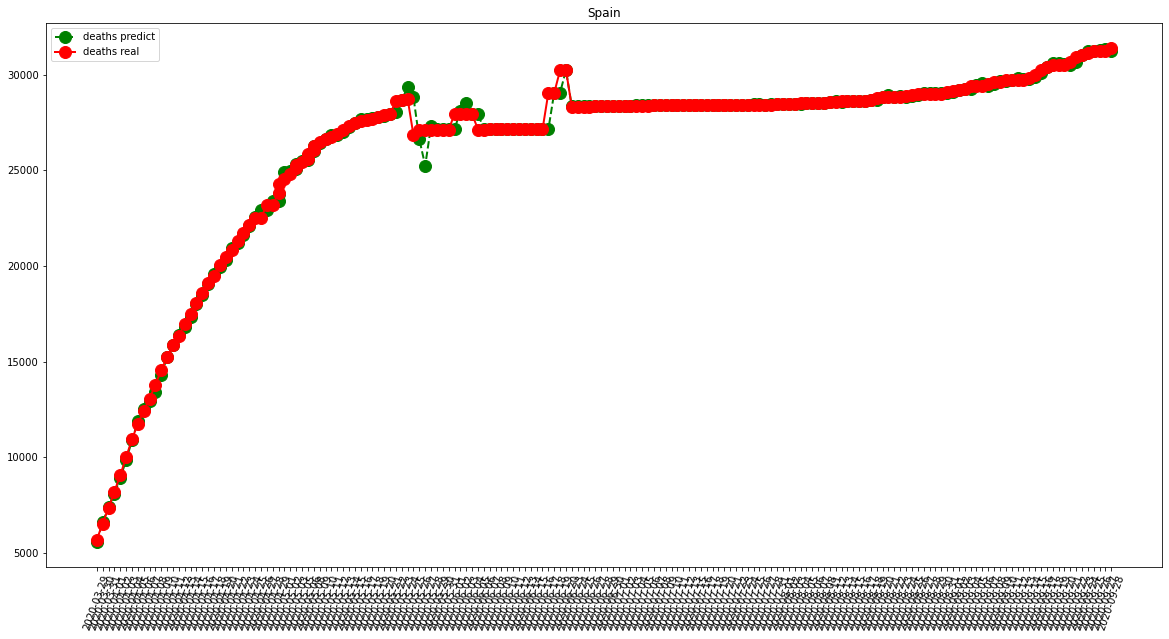

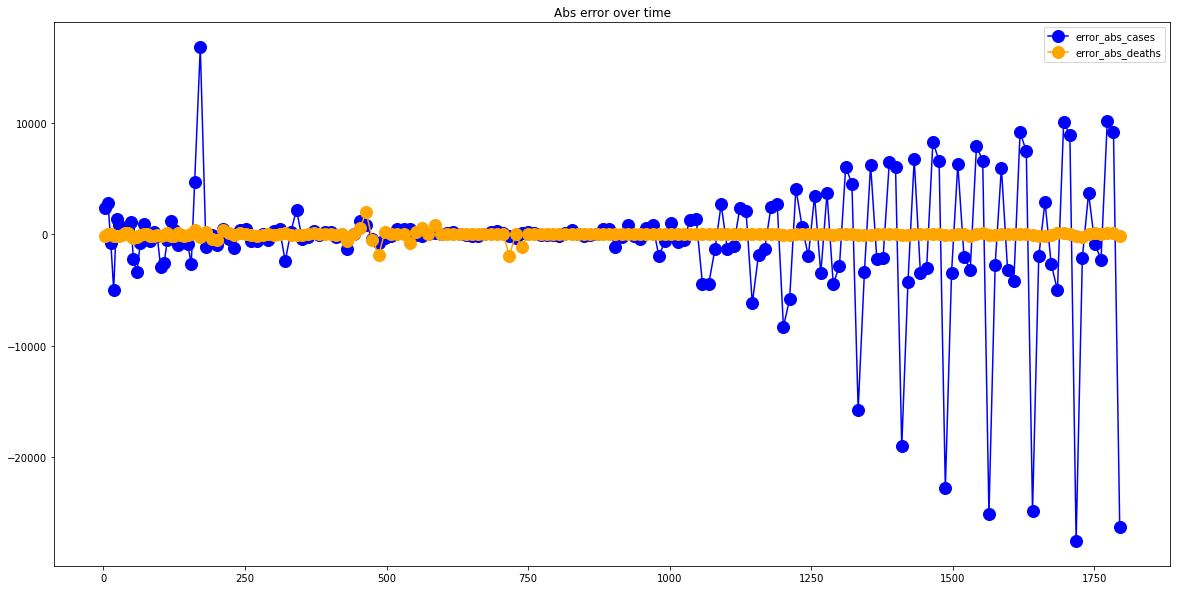

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  16246.58888888889
RMSE =  23569.673850098137
-- United States performances for deaths --
MAE =  482.1388888888889
RMSE =  670.5607645015393


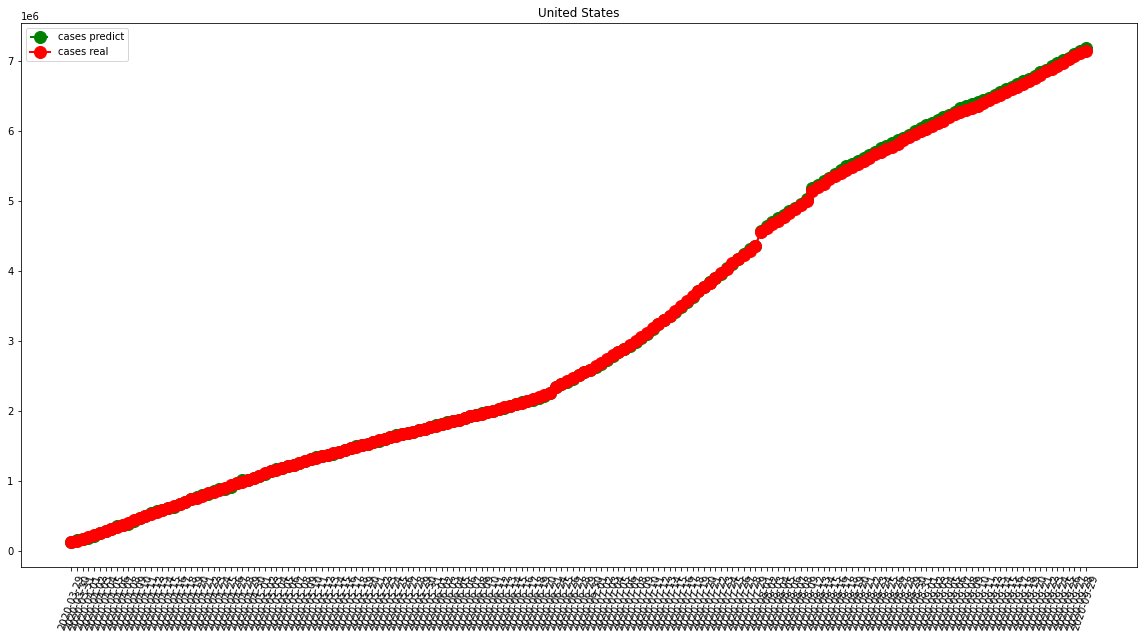

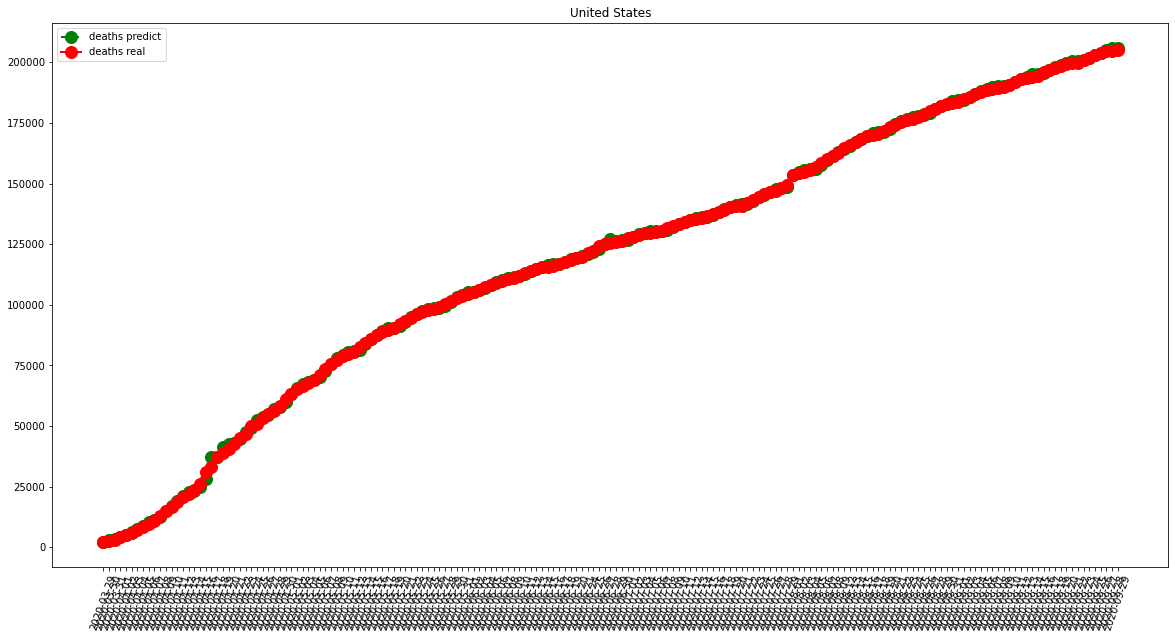

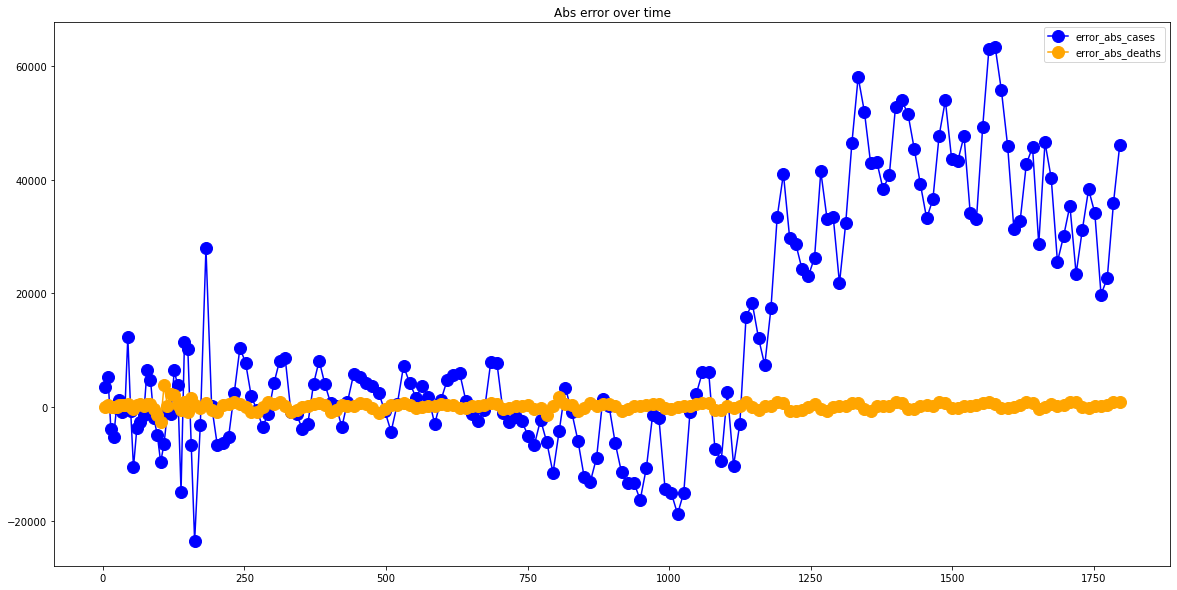

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  56.894444444444446
RMSE =  89.02855347209307
-- China performances for deaths --
MAE =  23.91111111111111
RMSE =  117.05483045706971


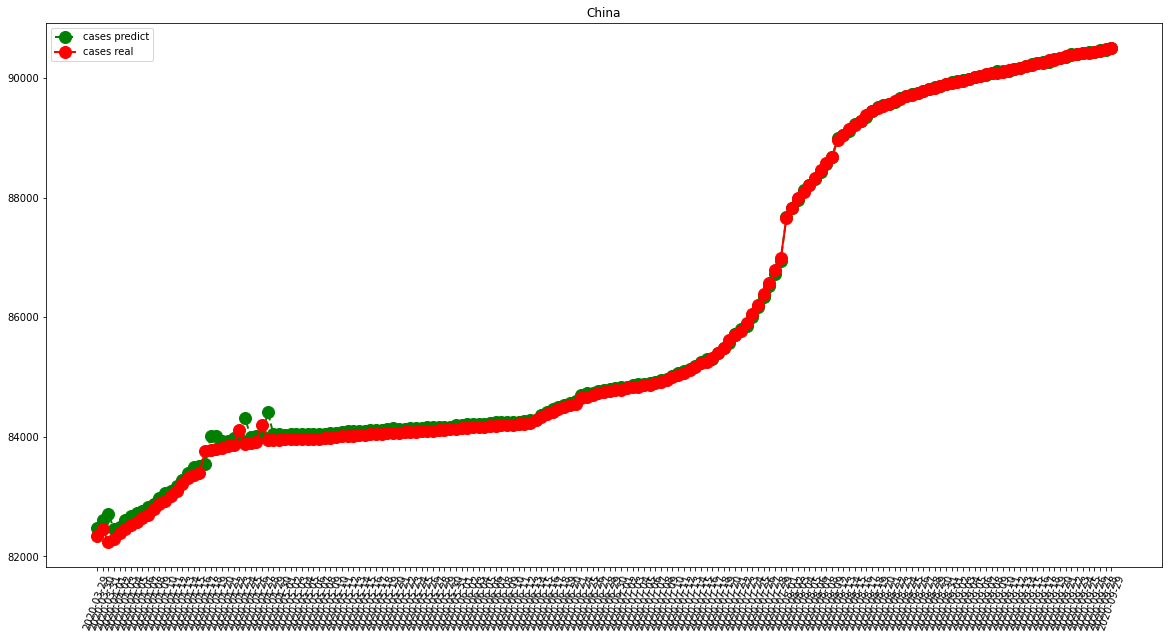

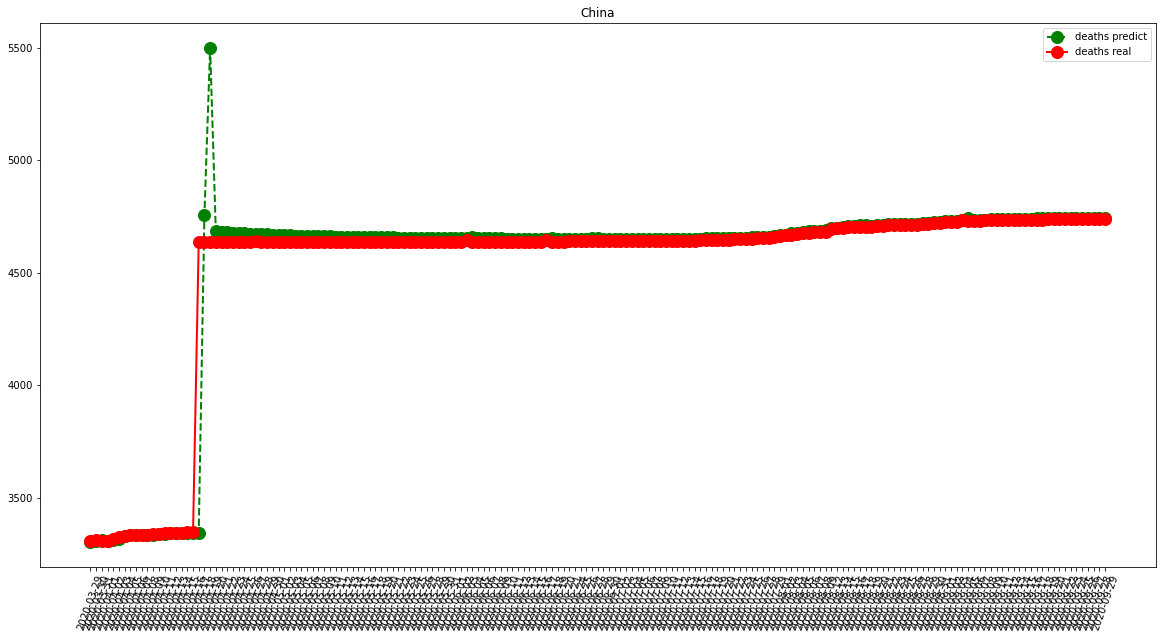

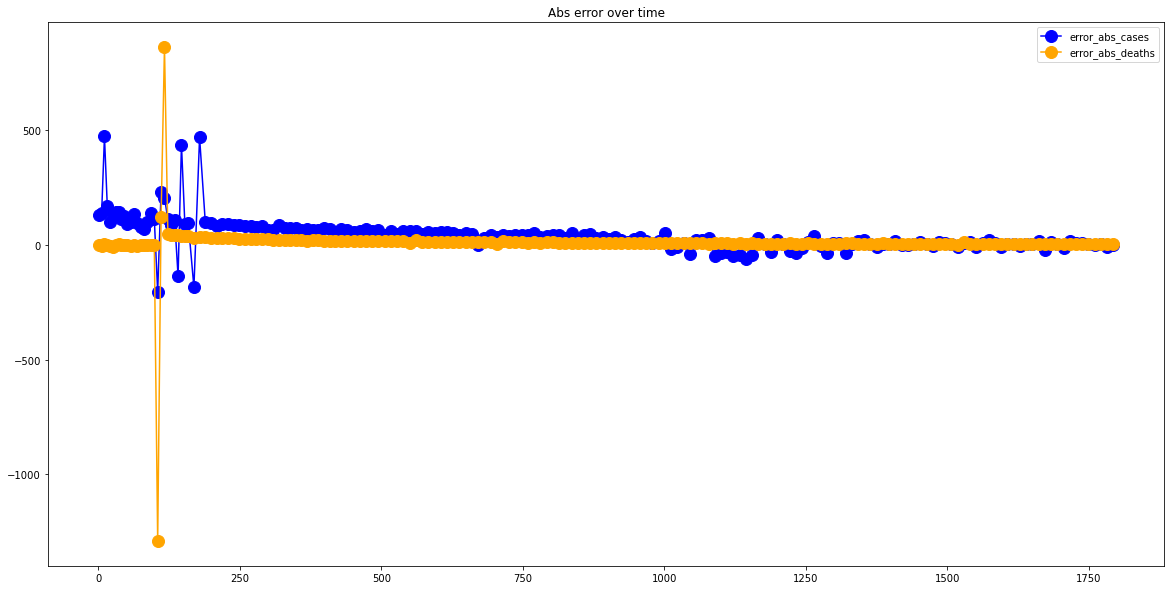

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1059.7697368421052
RMSE =  3440.6860517313908
-- United Kingdom performances for deaths --
MAE =  204.1578947368421
RMSE =  692.3327367827211


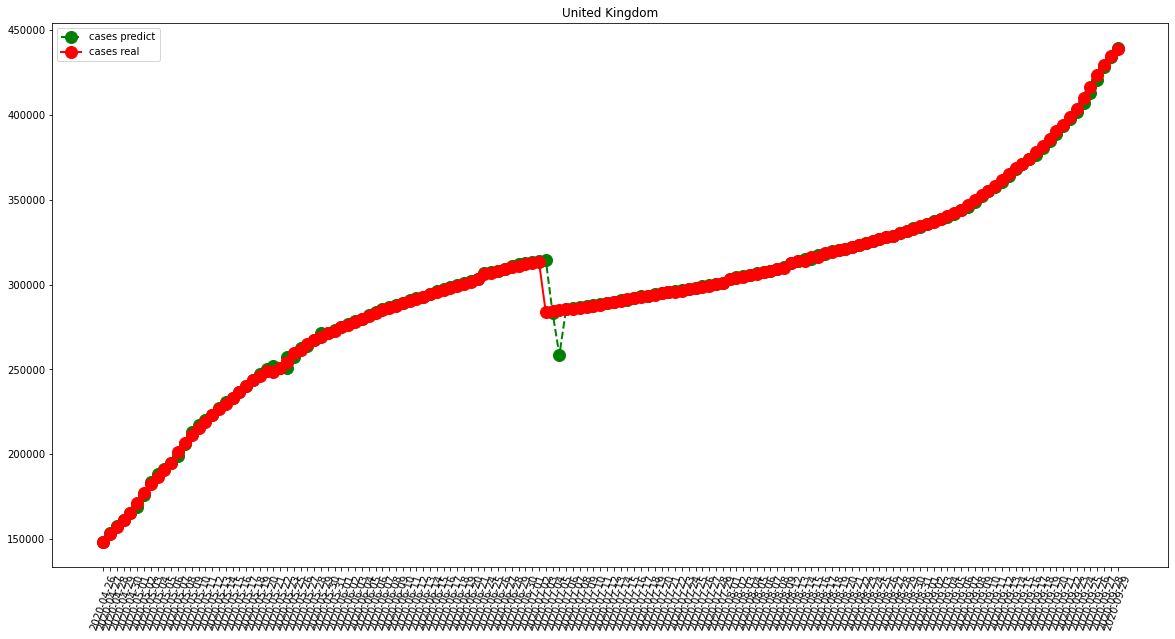

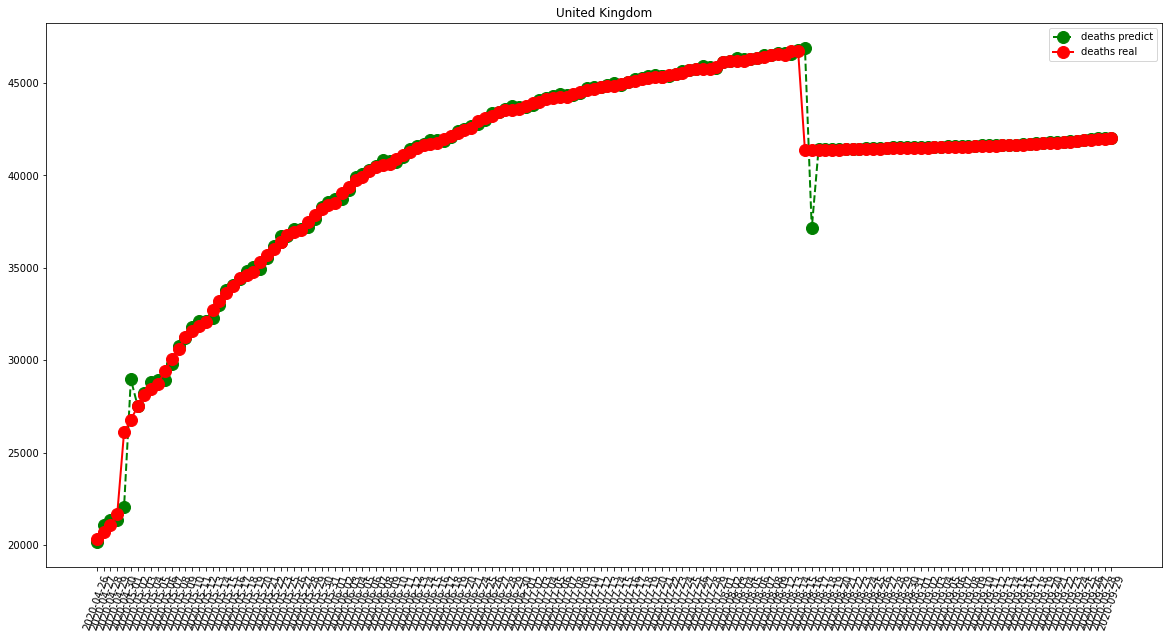

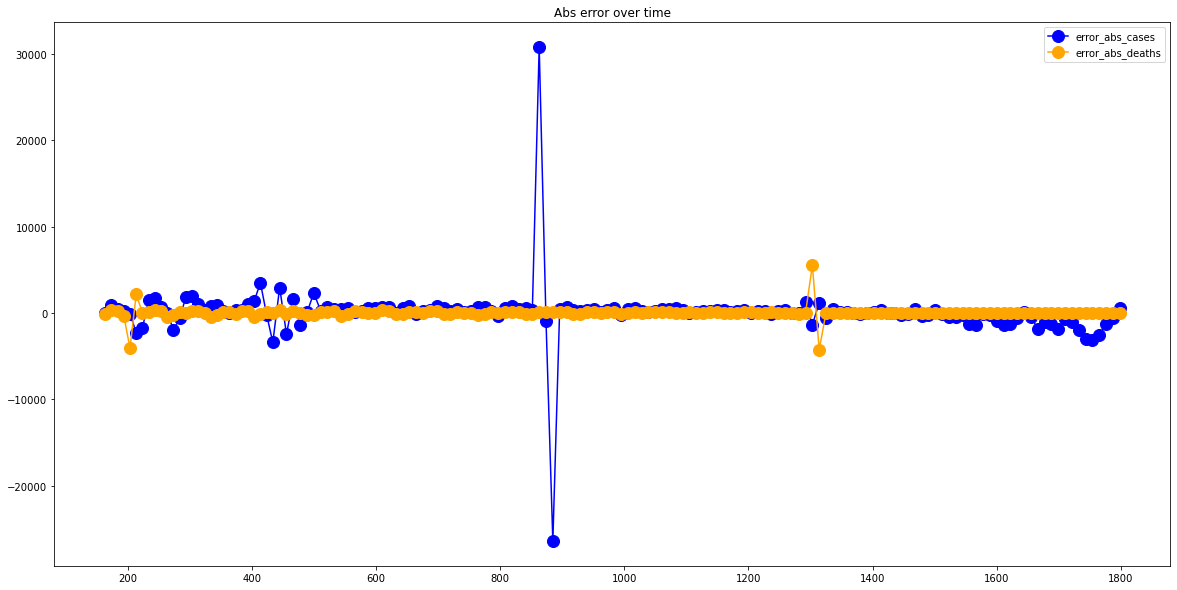

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  430.6842105263158
RMSE =  593.1615449614486
-- Germany performances for deaths --
MAE =  18.31578947368421
RMSE =  35.79381746085562


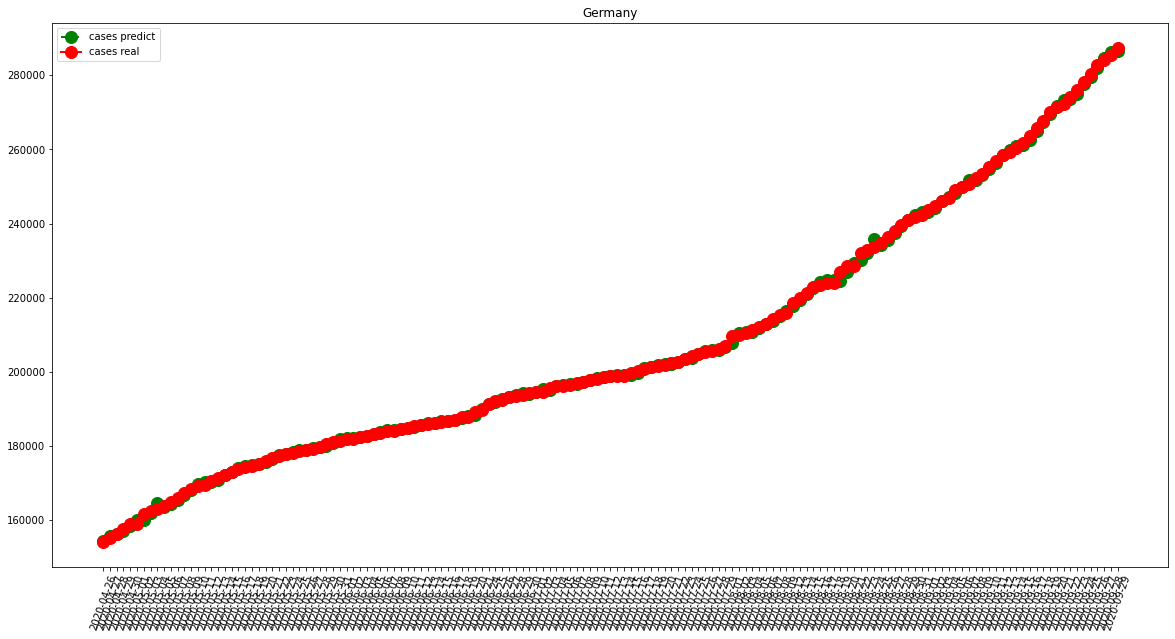

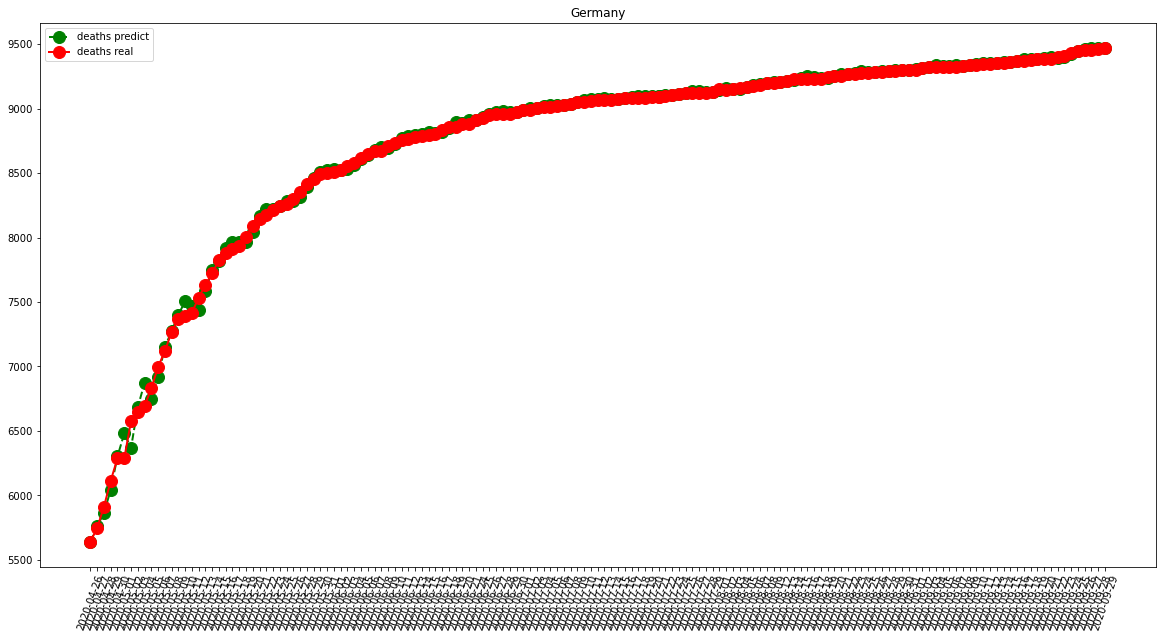

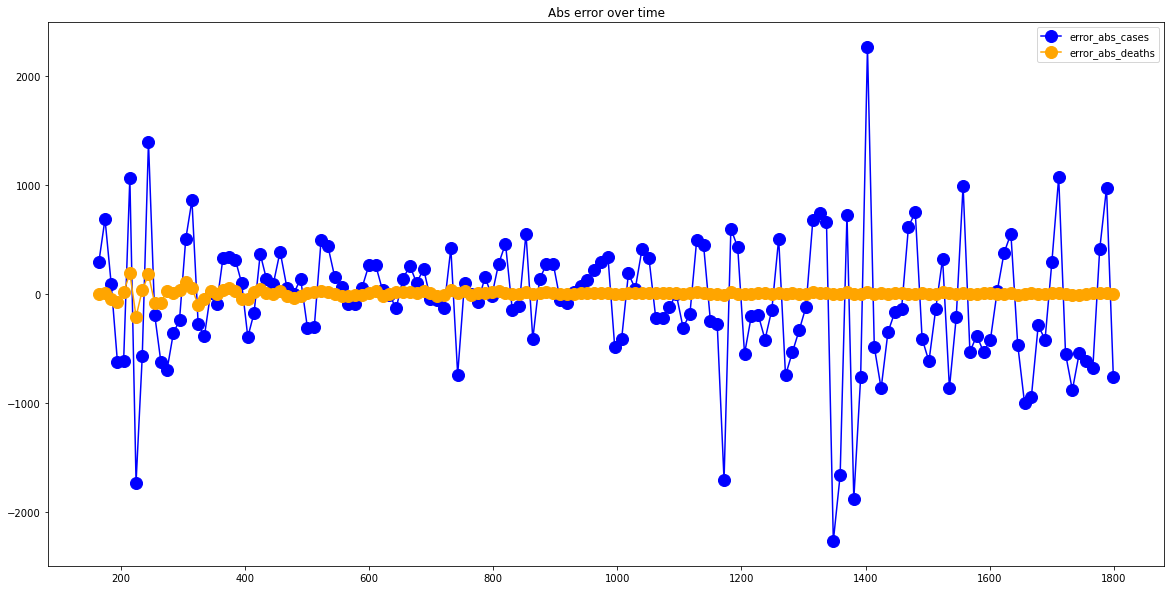

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  855.7434210526316
RMSE =  1205.0631971853286
-- Iran performances for deaths --
MAE =  50.48684210526316
RMSE =  83.32964026904484


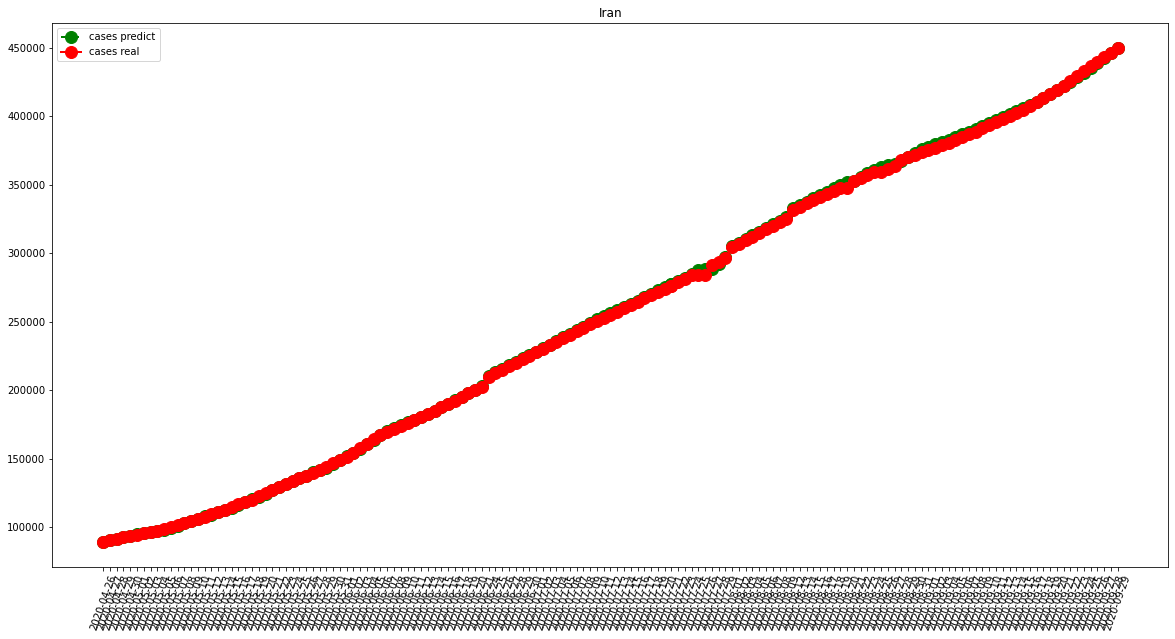

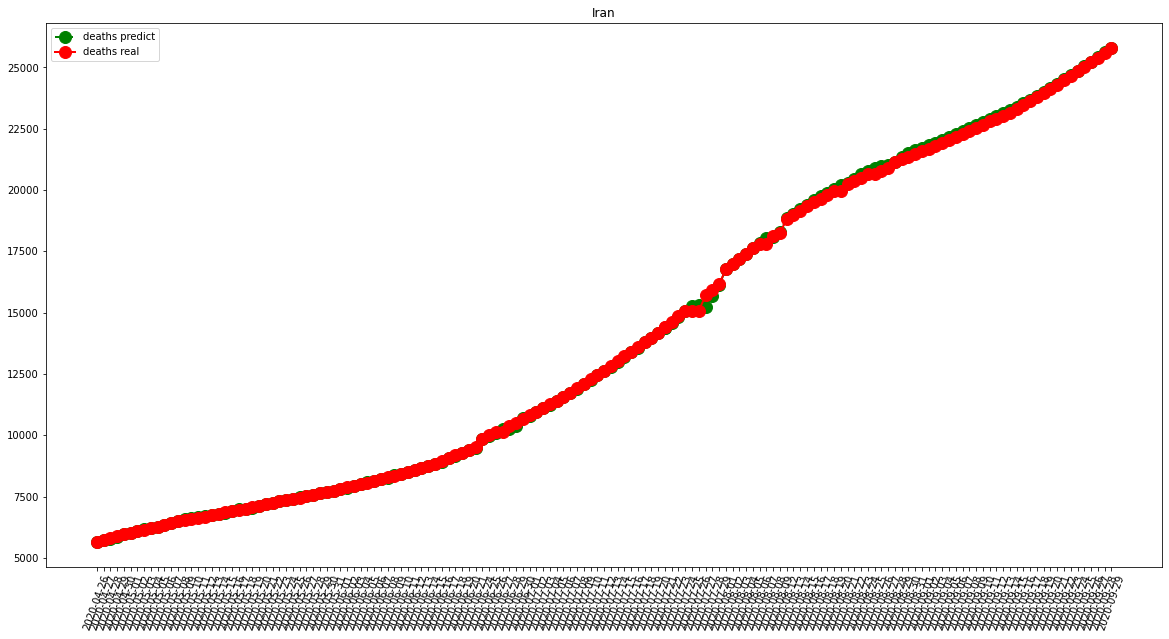

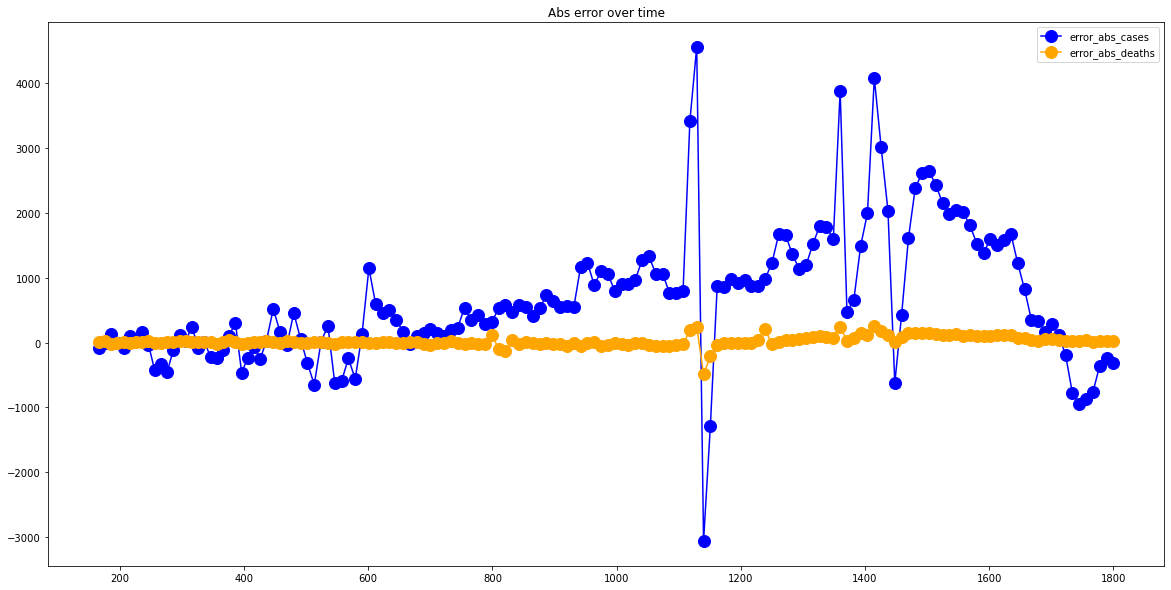

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  226.26973684210526
RMSE =  331.2300738793283
-- Turkey performances for deaths --
MAE =  15.769736842105264
RMSE =  82.61057183525223


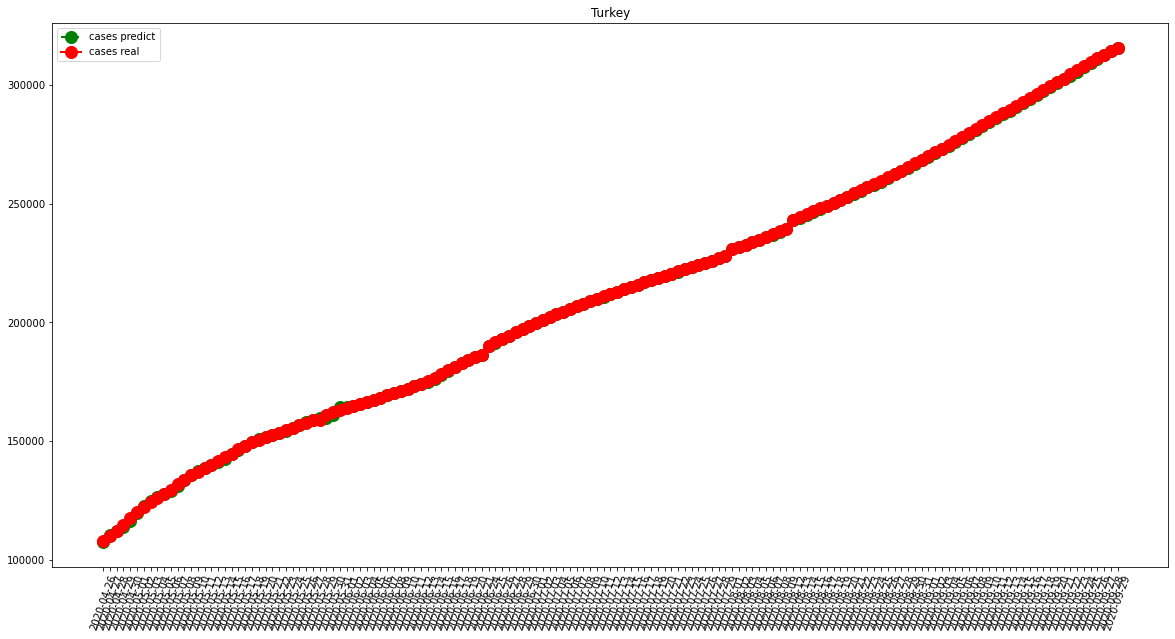

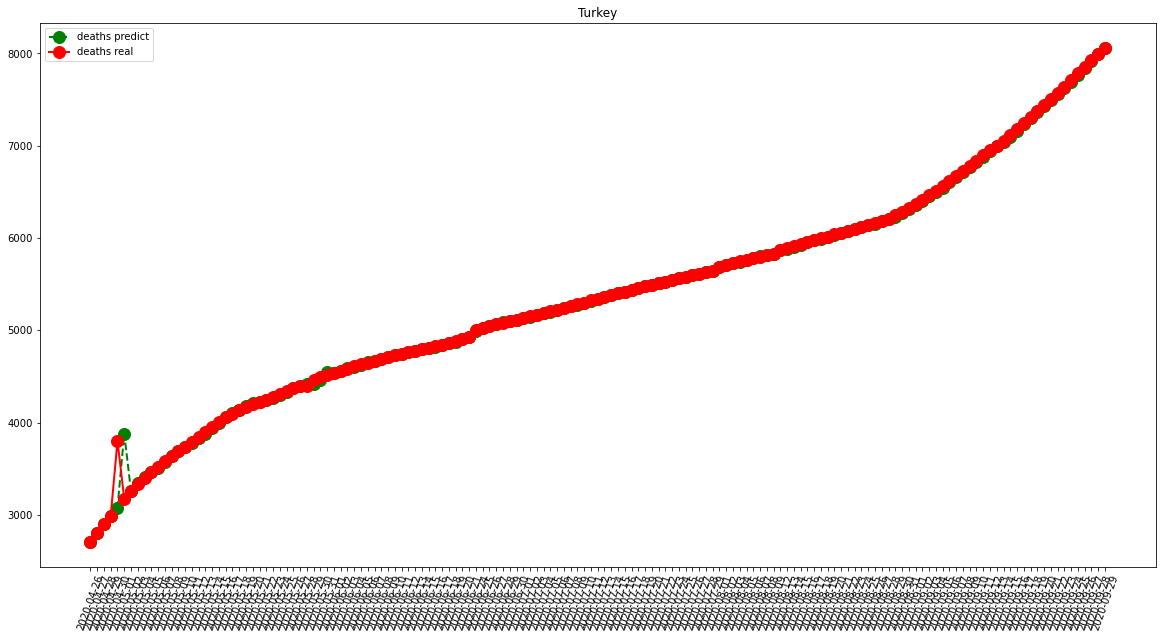

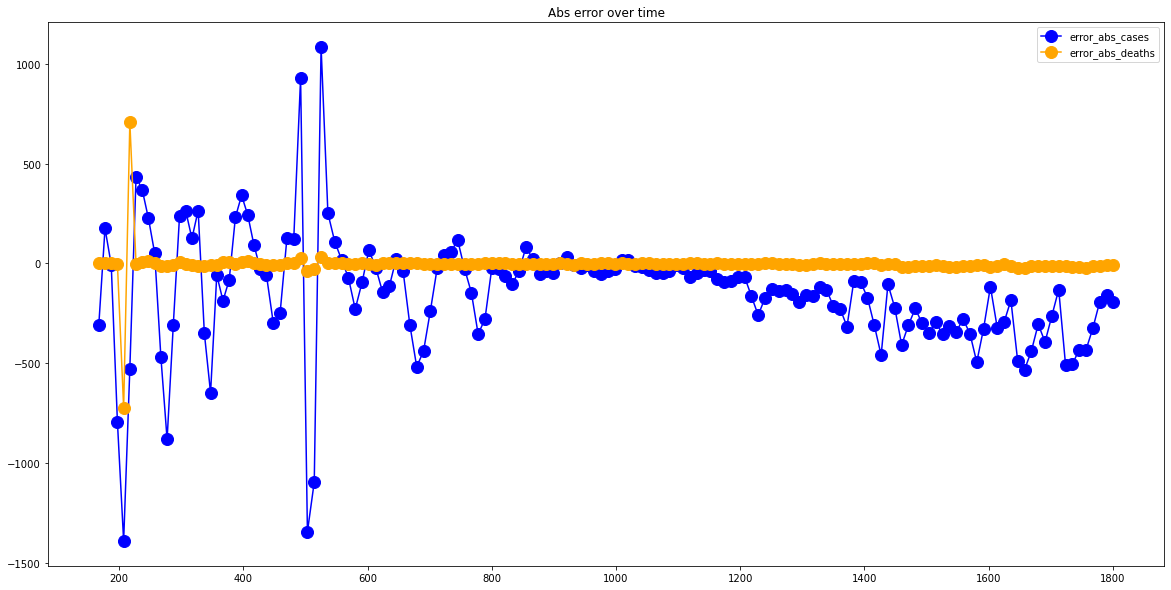

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  17323.232
RMSE =  22487.875009969262
-- Brazil performances for deaths --
MAE =  508.32
RMSE =  613.7447677984718


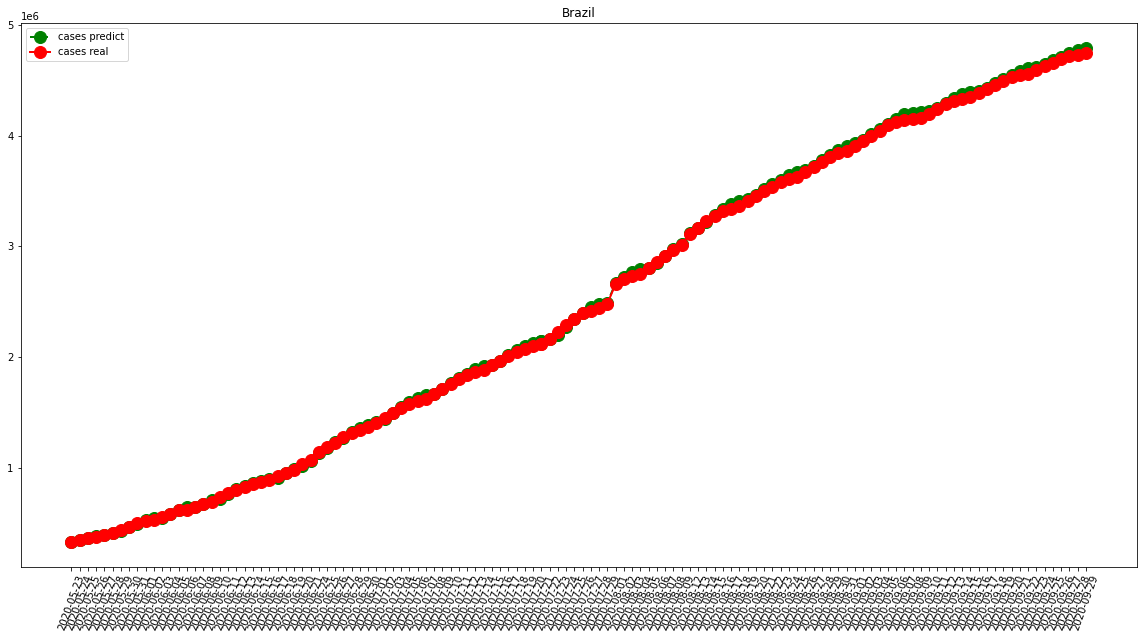

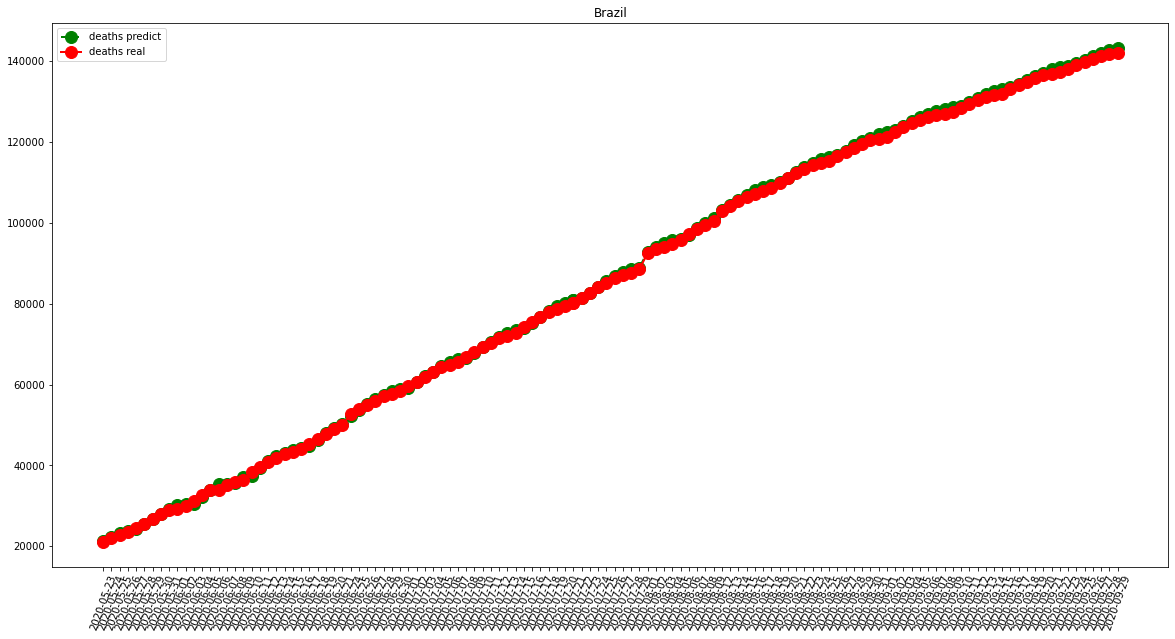

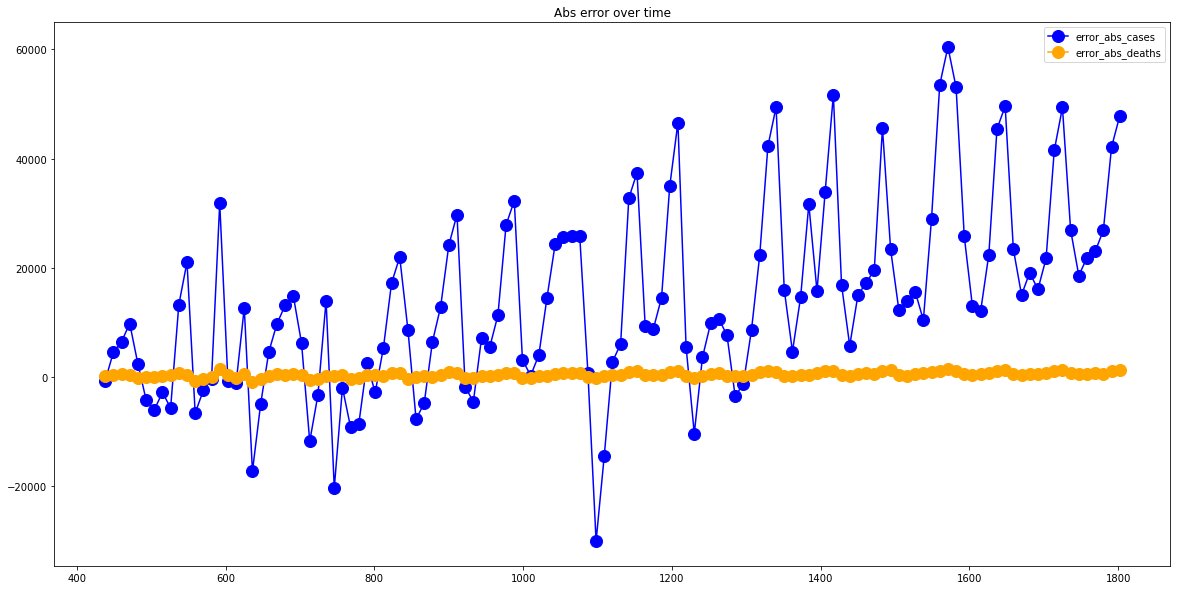

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)